In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**EDA**

In [70]:
df = pd.read_csv("/home/cacaprog/learning-projects/ml-zoomcamp/data/housing.csv")

In [71]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [73]:
df.describe(include="all")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


<Axes: >

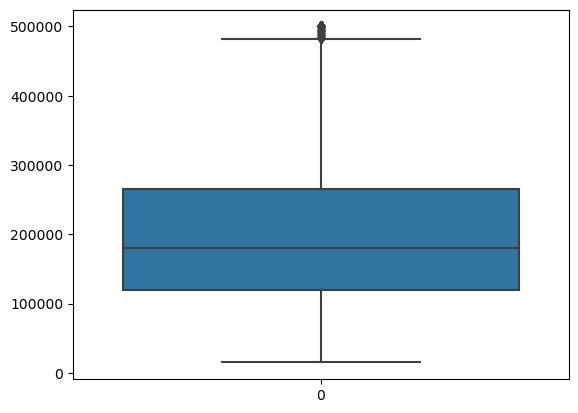

In [74]:
sns.boxplot(data= df['median_house_value'])

<Axes: xlabel='median_house_value', ylabel='Count'>

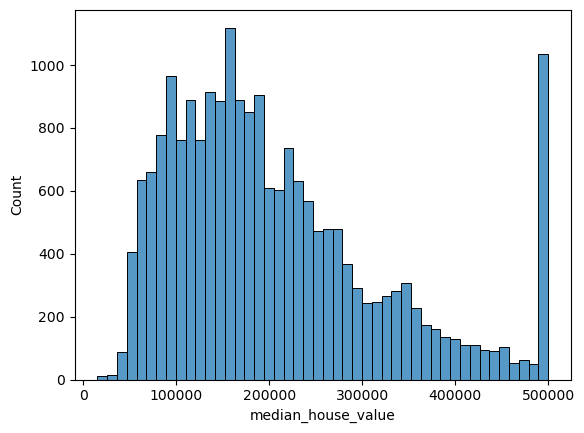

In [75]:
sns.histplot(df.median_house_value)

We have a lot of median house values ~500.000

**Preparing the dataset**

In [76]:
columns = ['latitude', 'longitude', 'housing_median_age', 
           'total_rooms', 'total_bedrooms', 'population', 
           'households', 'median_income', 'median_house_value']

In [77]:
filtered_df = df[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]

In [78]:
house_df = filtered_df[columns]

In [79]:
house_df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


In [80]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15687 entries, 701 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            15687 non-null  float64
 1   longitude           15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15530 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [81]:
house_df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [82]:
np.median(house_df.population)

1195.0

In [83]:
house_df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [84]:
# export the dataset
file_path = '/home/cacaprog/learning-projects/ml-zoomcamp/data/house_df.csv'
house_df.to_csv(file_path, index=False)

**Prepare and split the dataset**

In [85]:
# Let's check the size of train, test and validation subset
n = len(house_df)
n_train = int(n * 0.6)
n_test = int(n * 0.2)
n_val = int(n - (n_train + n_test))

print(n, n_train, n_test, n_val)

15687 9412 3137 3138


In [86]:
n_train + n_test + n_val

15687

In [87]:
# shuffle the data
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [88]:
idx

array([15183,  4469,  9316, ...,  5390,   860,  7270])

In [89]:
# Split the dataset
df_train = house_df.iloc[idx[:n_train]]
df_val = house_df.iloc[idx[n_train: n_train + n_val]]
df_test = house_df.iloc[idx[n_train + n_val:]]

In [90]:
print(n_train, len(df_train))
print(n_val, len(df_val))
print(n_test, len(df_test))

9412 9412
3138 3138
3137 3137


In [91]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [92]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
1,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
2,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
3,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
4,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [93]:
df_test.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,33.90,-117.44,23.0,4487.0,754.0,2609.0,778.0,4.2788,148700.0
1,38.03,-121.65,28.0,3144.0,694.0,1095.0,482.0,3.4402,192400.0
2,37.25,-121.85,20.0,3773.0,624.0,1965.0,607.0,5.4939,241200.0
3,32.78,-116.97,35.0,1113.0,236.0,681.0,246.0,2.9784,136400.0
4,37.97,-121.32,43.0,2453.0,490.0,1093.0,438.0,2.9107,88800.0


In [94]:
df_val.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,34.00,-118.41,18.0,1307.0,441.0,884.0,456.0,2.9338,276300.0
1,37.02,-120.09,9.0,1608.0,297.0,1057.0,295.0,3.7143,81600.0
2,33.84,-117.88,34.0,1410.0,214.0,837.0,240.0,6.1168,213900.0
3,33.95,-118.21,32.0,1116.0,328.0,1265.0,302.0,2.2950,155200.0
4,36.32,-119.32,29.0,2409.0,436.0,1142.0,440.0,3.6895,87700.0


In [95]:
# Transform the values of target in log
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

<Axes: ylabel='Count'>

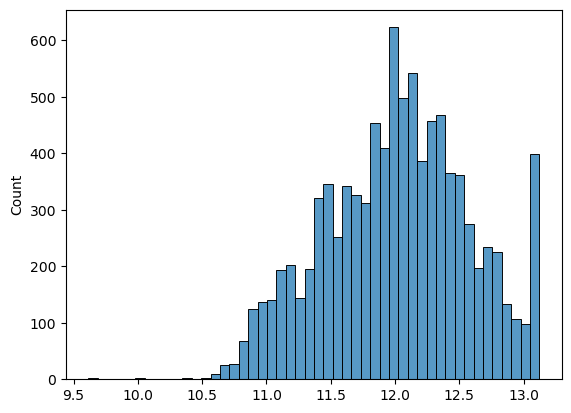

In [96]:
sns.histplot(y_train)

In [97]:
# Delete the target values to avoid accidently use
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [98]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9412 entries, 0 to 9411
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            9412 non-null   float64
 1   longitude           9412 non-null   float64
 2   housing_median_age  9412 non-null   float64
 3   total_rooms         9412 non-null   float64
 4   total_bedrooms      9318 non-null   float64
 5   population          9412 non-null   float64
 6   households          9412 non-null   float64
 7   median_income       9412 non-null   float64
dtypes: float64(8)
memory usage: 588.4 KB


**Linear regression model**

Option 1: Fill the NaN values with 0

In [99]:
X_train = df_train.fillna(0)

In [100]:
X_train.isnull().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [101]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    # return the base price and the full price for the house
    return w_full[0], w_full[1:]

In [102]:
w0, w = train_linear_regression(X_train, y_train)

In [103]:
print(w0, w)

-9.760282387848296 [-2.68175850e-01 -2.55894354e-01  1.78278062e-03 -3.37898192e-05
  2.93842680e-04 -1.52111419e-04  3.96416869e-04  1.80614799e-01]


Evaluate the model

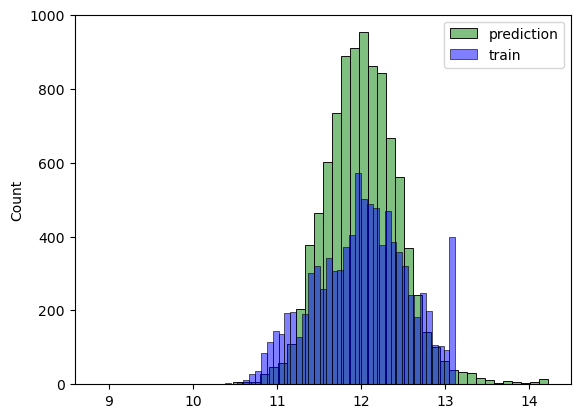

In [104]:
y_pred = w0 + X_train.dot(w)

sns.histplot(y_pred, color='green', label = 'prediction', alpha = 0.5, bins = 50)
sns.histplot(y_train, color='blue', label = 'train', alpha = 0.5, bins = 50)
plt.legend()

RMSE - root mean squared error

In [105]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2 # squared error
    mse = se.mean() # mean of squared error
    return round(np.sqrt(mse), 2) # root of the mean squared error

In [106]:
score_with_zero = rmse(y_train, y_pred)
score_with_zero

0.34

The model is not too bad.

Now, let's check if the other option (mean), work better.

In [107]:
total_bedrooms_mean = df_train['total_bedrooms'].mean()
X_train = df_train.fillna(total_bedrooms_mean)

In [108]:
X_train.isnull().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [109]:
w0, w = train_linear_regression(X_train, y_train)

In [110]:
print(w0, w)

-9.883233236514645 [-2.68595357e-01 -2.56982380e-01  1.80454530e-03 -3.87168461e-05
  3.78946613e-04 -1.49559864e-04  3.24795613e-04  1.81966411e-01]


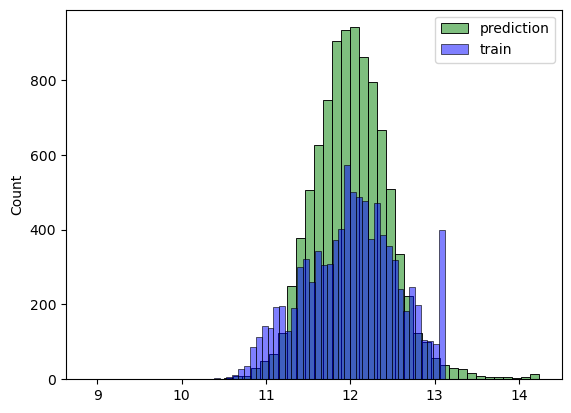

In [111]:
y_pred = w0 + X_train.dot(w)

sns.histplot(y_pred, color='green', label = 'prediction', alpha = 0.5, bins = 50)
sns.histplot(y_train, color='blue', label = 'train', alpha = 0.5, bins = 50)
plt.legend()

In [112]:
#score_mean = rmse(y_train, y_pred)
#score_mean

**Train a regularized linear regression**

In [113]:
X_train = df_train.fillna(0)

In [114]:
# Linear regression with regularization
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    # return the base price and the full price for the house
    return w_full[0], w_full[1:]

In [115]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)#
    X_val = df_val.fillna(0)
    y_pred = w0 + X_val.dot(w)#
    score = rmse(y_val, y_pred)
    print(r, w0, score)

0 -9.760282387848296 0.34
1e-06 -9.760261746316957 0.34
0.0001 -9.758218722588023 0.34
0.001 -9.739684918151518 0.34
0.01 -9.55814571047718 0.34
0.1 -8.056406238130387 0.34
1 -3.1321498331932545 0.34
5 -0.84081192447341 0.35
10 -0.43797333728257926 0.35


Let's find out how selecting the seed influences our score.

In [116]:
df = house_df.copy()

n = len(df)
 
n_train = int(n * 0.6)
n_test = int(n * 0.2)
n_val = int(n - (n_train + n_test))

score = []
seed = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for s in seed:
    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)

# Split the dataset
    df_train = df.iloc[idx[:n_train]].copy().reset_index(drop=True)
    df_val = df.iloc[idx[n_train: n_train + n_val]].copy().reset_index(drop=True)
    df_test = df.iloc[idx[n_train + n_val:]].copy().reset_index(drop=True)

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    X_train = df_train.fillna(0)
    
    def train_linear_regression(X, y):
        ones = np.ones(X.shape[0])
        X = np.column_stack([ones, X])
    
        XTX = X.T.dot(X)
        XTX_inv = np.linalg.inv(XTX)
        w_full = XTX_inv.dot(X.T).dot(y)
    
    # return the base price and the full price for the house
        return w_full[0], w_full[1:]
    
    w0, w = train_linear_regression(X_train, y_train)

    y_pred = w0 + X_train.dot(w)

    def rmse(y, y_pred):
        se = (y - y_pred) ** 2 # squared error
        mse = se.mean() # mean of squared error
        return round(np.sqrt(mse), 2) # root of the mean squared error

    score.append(rmse(y_train, y_pred))

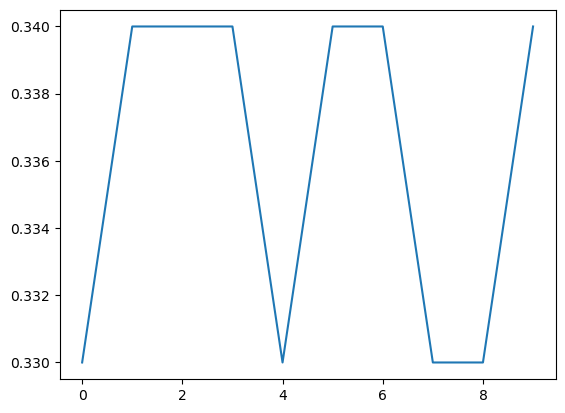

In [117]:
plt.plot(score)

In [118]:
score

[0.33, 0.34, 0.34, 0.34, 0.33, 0.34, 0.34, 0.33, 0.33, 0.34]

In [119]:
# Calculate the std of score
std_of_score = np.std(score)
round(std_of_score, 3)

0.005

**Regularization**

In [120]:
def split_dataset(df, seed):
    df = house_df.copy()
    
    n = len(df)
    n_train = int(n * 0.8)
    n_test = n - n_train

    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

# Split the dataset
    df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
    df_test = df.iloc[idx[n_train:]].reset_index(drop=True)

# Extract the target variable and apply log transformation
    y_train = np.log1p(df_train['median_house_value'].values)
    y_test = np.log1p(df_test['median_house_value'].values)

    # Remove the target variable from the features
    df_train.drop(columns=['median_house_value'], inplace=True)
    df_test.drop(columns=['median_house_value'], inplace=True)

    # Fill missing values in the features with 0
    X_train = df_train.fillna(0)
    X_test = df_test.fillna(0)

    return X_train, X_test, y_train, y_test

In [121]:
X_train, X_test, y_train, y_test = split_dataset(house_df, 9)

In [122]:
X_train.shape

(12549, 8)

In [123]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    # return the base price and the full price for the house
    return w_full[0], w_full[1:]

In [124]:
w0, w = train_linear_regression_reg(X_train, y_train, 0.001)

In [125]:
def rmse(y):
    y_pred = w0 + X_train.dot(w)
    se = (y - y_pred) ** 2 # squared error
    mse = se.mean() # mean of squared error
    return round(np.sqrt(mse), 2) # root of the mean squared error

In [126]:
rmse(y_train)

0.34

In [127]:
w0, w = train_linear_regression_reg(X_test, y_test, 0.001)

In [128]:
def rmse(y_test):
    y_pred = w0 + X_test.dot(w)
    se = (y_test - y_pred) ** 2 # squared error
    mse = se.mean() # mean of squared error
    return round(np.sqrt(mse), 2) # root of the mean squared error

In [129]:
rmse(y_test)

0.33